# Homework 4: Final Project
Taxis are widely used in New York City and the recorded information of where and when taxi cabs are requested can be valuable to understand traffic flow and movement patterns in the city. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC). The For-Hire Vehicle (“FHV”) trip records include fields capturing the dispatching base license number and the pick-up date, time, and taxi zone location ID (shape file below). These records are generated from the FHV Trip Record submissions made by bases. 

In particular, we will study how the COVID-19 pandemic affected taxi ridership as well as pickup-dropoff location patterns in NYC. We can think of March 2020 to be a sort of natural experiment to understand how increased remote working would change city traffic patterns. The key challenge is that the data that we consider is highly seasonal. Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year, as a result we will have to tease out the differences between changes due to seasonality versus changes due to COVID-19.

The homework assignment will directly build on the reading and reflection for the last week.

### Setup. Accessing and Loading The Dataset
The dataset in question covers taxi trips in NYC in the first six months of 2020. There are millions of such trips, and we will use scalable data science tools to analyze this data.  All of data is organized in a google drive.

https://drive.google.com/drive/folders/1ZpljF2lGBkc2MMG6IdWxQQuQW6Zfpswg?usp=sharing

* The first thing that you need to do is to create a shortcut to this shared folder in your drive. You can do so by clicking on the folder name at the top and adding a shortcut. 

* Next, run the following code that mounts your drive to the collab notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once you mount the drive, you should be able to access the directory as you would in standard Python. You can see that there are all the files that we covered in class!

In [ ]:
import os
os.listdir('/content/drive/My Drive/tripdata/')

['Legally_Operating_Businesses.csv',
 'fhvhv_tripdata_2020-01.csv',
 'fhvhv_tripdata_2020-02.csv',
 'fhvhv_tripdata_2020-03.csv',
 'fhvhv_tripdata_2020-04.csv',
 'fhvhv_tripdata_2020-05.csv',
 'fhvhv_tripdata_2020-06.csv',
 'taxi-zones']

## Loading This Data Into Dask
We will use the Dask library to load and process this data. First, run the following code to install the dask dataframe package.

In [ ]:
!pip install dask[dataframe]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We can import Dask as before.

In [ ]:
import dask.dataframe as dd

As, in lecture, the following code will load the taxi trip data into Dask.

In [ ]:
df = dd.read_csv('/content/drive/My Drive/tripdata/fhvhv_tripdata_2020-*.csv')
df.head()


,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,HV0003,B02864,2020-01-01 00:45:34,2020-01-01 01:02:20,148,90,NaN
1,HV0003,B02682,2020-01-01 00:47:50,2020-01-01 00:53:23,114,79,NaN
2,HV0003,B02764,2020-01-01 00:04:37,2020-01-01 00:21:49,4,125,NaN
3,HV0003,B02764,2020-01-01 00:26:36,2020-01-01 00:33:00,231,113,NaN
4,HV0003,B02764,2020-01-01 00:37:49,2020-01-01 00:46:59,114,144,NaN


### Demo Code
Here, we paste some of the demo code from lecture that runs the basic analysis we covered in lecture. It calculates the mean and standard deviation of the length of trips in the covered time-period.

In [ ]:
df['dropoff_datetime_py'] = dd.to_datetime(df['dropoff_datetime'])
df['pickup_datetime_py'] = dd.to_datetime(df['pickup_datetime'])
df['difference'] = (df['dropoff_datetime_py'] - df['pickup_datetime_py'])
df['difference_seconds'] = df['difference'].dt.total_seconds()
df['difference_seconds'].mean().compute(), df['difference_seconds'].std().compute()

(1013.1593988487339, 691.1400486498965)

### Question 1. How Does The Average Length of Trip Change At the Start of the COVID-19 Pandemic (March 20th)?

It is your responsibility to read the Dask documentation and learn the right syntax for answering this question. 

https://docs.dask.org/en/latest/dataframe.html

In [ ]:
import datetime
start = datetime.datetime(2020, 3, 20)

beyond_pickup = df.loc[dd.to_datetime(df['pickup_datetime']) > start]
before_pickup = df.loc[dd.to_datetime(df['pickup_datetime']) < start]

before_pickup['difference_seconds'].mean().compute() - beyond_pickup['difference_seconds'].mean().compute()

141.26461272056815

Your answer goes here.

### Question 2. What Is the Most Popular Taxi Route in the City?
PULocationID, DOLocationID describe the pickup and dropoff locations of the taxi ride. What is the most popular pair?

In [ ]:
import collections

pu = df['PULocationID']
do = df['DOLocationID'] 
loc = []
ret = []
for i in range(len(pu.index)):
  ret.append((pu.loc[i],do.loc[i]))

collections.Counter(ret).most_common()




Your answer goes here

### Question 3. What is the Most Popular Time of Data To Request a Taxi?
Use the pickup time to determine when taxis get requested the most. You will plot this data as a histogram. The following code will help you get started.

In [ ]:
#create some random data
import random 

hours = [ str(i)+':00' for i in range(24)] #hours of the day
data = [random.randint(0, 10) for i in range(24)] #for each hour set a random number 0 to 10

The code below plots this data.

<BarContainer object of 24 artists>

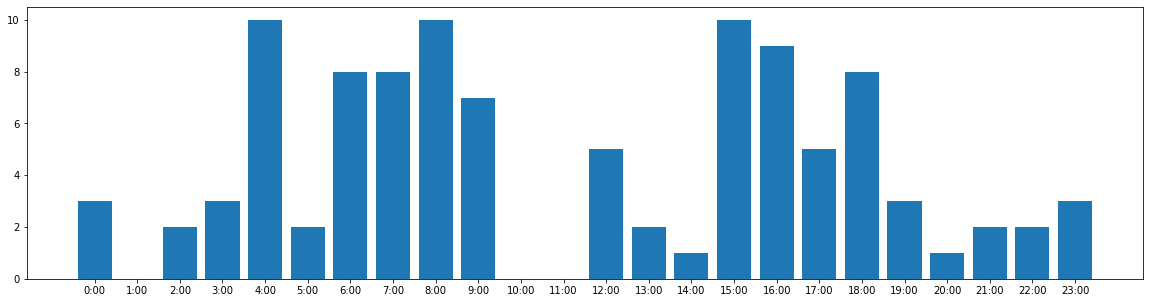

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
plt.bar(hours, data)

In [ ]:
data = []
for x in df['pickup_datetime_py']:
  data.append(x.hour)

Any dicussion goes here.

### Question 4. Load the Geospatial Taxi Zone Data Using Geopandas
The fields above have two interesting columns: 'PULocationID' and 'DOLocationID'. These ids correspond to locations in the city called "taxi zones". You will next use the geopandas library to load the latitude and longitude regions that each of the NYC taxi zones correspond to. In the tripdata folder, there is a subfolder called taxi-zones. From that folder you will use geopandas to load the "shp" file. Please look at prior class lectures for an example of how to do this.

Then, plot the loaded shapefile. Your plot should look as follows:
https://github.com/CMSC-13600-Data-Engineering/HW4/blob/main/Screen%20Shot%202022-05-13%20at%205.32.36%20PM.png

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
taxiZones = gpd.read_file('/content/drive/My Drive/tripdata/taxi-zones')
taxiZones.plot()
taxiZones.head()

### Question 5. Number of Pickup and Dropoffs Across The City
For each taxi zone you will calculate total number of pickups and dropoffs originating from or ending at respectively. Your code should result in two plots: https://github.com/CMSC-13600-Data-Engineering/HW4/blob/main/Screen%20Shot%202022-05-13%20at%205.36.05%20PM.png

https://github.com/CMSC-13600-Data-Engineering/HW4/blob/main/Screen%20Shot%202022-05-13%20at%205.38.29%20PM.png

In [ ]:
taxiZones['location_i'] = taxiZones['location_i'].apply(int)

In [ ]:
pu_zones = df.groupby('PULocationID').count().compute()
do_zones = df.groupby('PULocationID').count().compute()

pu_zones = taxiZones.merge(pu_zones, right_on='PULocationID', left_on='location_i')
do_zones = taxiZones.merge(do_zones, right_on='DOLocationID', left_on='location_i')

KeyboardInterrupt: ignored

In [ ]:
pu_zones.plot(column='location_i',legend=True, cmap='OrRd')
do_zones.plot(column='location_i',legend=True, cmap='OrRd')

### Question 6. Average Trip Duration in Seconds By Pickup Location
For each pickup location, you will plot a map that considers the average trip duration in seconds. Your map should look something like this:
https://github.com/CMSC-13600-Data-Engineering/HW4/blob/main/Screen%20Shot%202022-05-13%20at%205.40.37%20PM.png

In [ ]:
trip_duration = df.groupby('PULocationID')['difference_seconds'].mean().compute()

In [ ]:
trip_duration = taxiZones.merge(trip_duration, right_on='PULocationID', left_on='location_i')
trip_duration.plot(column='location_i',legend=True, cmap='OrRd')

### Question 7. The Effects of the COVID Pandemic.
Next, you will only consider the pickups that occur in the month of March 2020. For these trips, we will consider a subset that happened before March 20th, and those that happen on or after March 20th. For each taxi region, you will count the number of trips originating from the region. Then, you will determine the percentage change before and after the pandemic, i.e., (before - after)/before * 100 %. 

Your final result should look like this: https://github.com/CMSC-13600-Data-Engineering/HW4/blob/main/Screen%20Shot%202022-05-13%20at%205.44.36%20PM.png

In [ ]:
start = datetime.datetime(2020, 3, 20)

beyond_pickup = df.loc[dd.to_datetime(df['pickup_datetime']) >= start]
before_pickup = df.loc[dd.to_datetime(df['pickup_datetime']) < start]

beyond_pu = df.groupby('PULocationID').count().compute()
before_pu = df.groupby('PULocationID').count().compute()

In [ ]:
diff = ((before_pu - beyond_pu)/before_pu) * 100

merged_df = taxiZones.merge(diff, right_on='PULocationID', left_on='location_i')

merged_df.plot(column='location_i',legend=True, cmap='OrRd')

## Question 8. Businesses in Highly Affected Taxi Zones
Finally, we have also included a dataset of businesses in NYC (Legally_Operating_Businesses.csv):
https://drive.google.com/file/d/1IQal9xJAuxMVZOofE5G1jwNf5ys80Ja_/view?usp=sharing

Over every taxi zone that had more than a 70% drop in traffic, count the number of businesses that are in those zones.

Hint 1. You will have to use the rtree package to merge the business data with the taxi zone data.

Hint 2. You will have to throw away a lot of business listings without lat,long data.

In [ ]:
!sudo apt install libspatialindex-dev
!pip install rtree
import rtree as rt
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
bus = dd.read_csv('/content/drive/My Drive/Legally_Operating_Businesses.csv')
taxi = gpd.read_file('/content/drive/My Drive/tripdata/taxi-zones')

bus['Longitude'] = bus['Longitude'].apply(float)
bus['Latitude'] = bus['Latitude'].apply(float)

gdf = gpd.GeoDataFrame(bus, geometry=gpd.points_from_xy(bus['Longitude'], bus['Latitude']))

idx = rtree.index.Index()

def build_index(geo_df):
    for i,row in geo_df.iterrows():
        idx.insert(i, row['geometry'].bounds)
        
build_index(bus)

/usr/local/lib/python3.7/dist-packages/dask/dataframe/core.py:3073: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Longitude', 'float64'))

  warnings.warn(meta_warning(meta))
/usr/local/lib/python3.7/dist-packages/dask/dataframe/core.py:3073: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Latitude', 'float64'))

  warnings.wa

NameError: ignored